In [1]:
import os
import zipfile

local_zip = '/data/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/data/')
zip_ref.close()

local_zip = '/data/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/data/')
zip_ref.close()

In [2]:
laptop_dir = os.path.join('/data/train/laptop')
phone_dir = os.path.join('/data/train/phone')

test_laptop_dir = os.path.join('/data/test/laptop')
test_phone_dir = os.path.join('/data/test/phone')

print('total training laptop images:', len(os.listdir(laptop_dir)))
print('total training phone images:', len(os.listdir(phone_dir)))

print('total test laptop images:', len(os.listdir(test_laptop_dir)))
print('total test phone images:', len(os.listdir(test_phone_dir)))

laptop_files = os.listdir(laptop_dir)
phone_files = os.listdir(phone_dir)

total training laptop images: 601
total training phone images: 601
total test laptop images: 240
total test phone images: 240


In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras import applications

In [4]:
train_datagen = ImageDataGenerator(vertical_flip=True,
                               horizontal_flip=True,
                               height_shift_range=0.1,
                               width_shift_range=0.1
                               )
train_generator = train_datagen.flow_from_directory(
	"/data/train/",
    target_size=(180, 180),
    batch_size = 32
)

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
	"/data/test/",
	target_size=(180,180),
	class_mode='categorical',
  batch_size=32
)

Found 1200 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [5]:
base_model= applications.resnet.ResNet50(
    include_top = False,
    input_shape=(180,180,3),
     pooling = 'avg',
     weights='imagenet')

add_model = Sequential()
add_model.add(base_model)

add_model.add(Dense(2, activation = 'softmax'))
add_model.layers[0].trainable = False

model = add_model
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
history = model.fit(
    train_generator, 
    epochs=5,
    batch_size=100, 
    steps_per_epoch=10, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=2)

94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                     

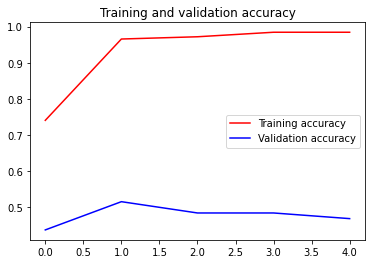

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()